# BREAST CANCER PROJECT USING SUPPORT VECTOR MACHINE, KNN CLASSIFIER AND RANDOM FORREST

In [13]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('Breast_Cancer_Prediction.csv')

In [15]:
df.head

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [16]:
df.shape

(569, 32)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [20]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [23]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [24]:
# mapping categorical values to numerical values
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [25]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                df.drop('diagnosis', axis=1),
                df['diagnosis'],
                test_size=0.2,
                random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [38]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[69  2]
 [ 3 40]]


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [40]:
knn_model_acc = accuracy_score(y_test, predictions)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.956140350877193


In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
predictions2 = rfc.predict(X_test)

In [44]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions2))
print("\n")
print(classification_report(y_test, predictions2))

Confusion Matrix: 
 [[70  1]
 [ 3 40]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [45]:
rfc_acc = accuracy_score(y_test, predictions2)
print("Accuracy of Random Forests Model is: ", rfc_acc)

Accuracy of Random Forests Model is:  0.9649122807017544


In [46]:
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)
predictions3 = svc_model.predict(X_test)

In [47]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions3))
print("\n")
print(classification_report(y_test, predictions3))

Confusion Matrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [48]:
svm_acc = accuracy_score(y_test, predictions3)
print("Accuracy of SVM model is: ", svm_acc)

Accuracy of SVM model is:  0.9824561403508771


<AxesSubplot:>

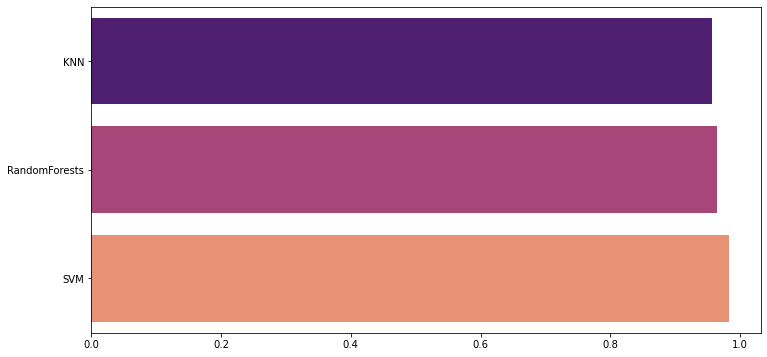

In [50]:
plt.figure(figsize=(12,6))
model_acc = [knn_model_acc, rfc_acc, svm_acc]
model_name = ['KNN', 'RandomForests', 'SVM']
sns.barplot(x= model_acc, y=model_name, palette='magma')